# Zipf’s Law
Zipf’s Law states that in natural language, the frequency of any word is inversely proportional to its rank in the frequency table.
In simpler terms:


The most common word appears twice as often as the second most common,

Three times as often as the third, and so on.

# Dataset Overview
In this project, we are analyzing a dataset sourced from Google Sheets, which contains textual content relevant for applying Zipf’s Law. The data appears to be structured as a collection of textual entries, possibly from literature, lyrics, or dialogues.

We'll begin by loading and inspecting the dataset to understand its structure and identify the column of interest for text analysis.

# Loading the Dataset

In [ ]:
import pandas as pd

sheet_id = "1lc7hbC9oijjjOrxSIs11IjXwxytKt04S6qMS5niuliQ"
gid = "1637581717"

csv_url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv&gid={gid}"

df = pd.read_csv(csv_url)
df


,Unnamed: 0,Artist,Title,Album,Year,Date,Lyric
0,0,Maroon 5,Girls Like You (Remix),Red Pill Blues,2018.0,2018-05-30,adam levine spent 4 hours i need more hours wi...
1,1,Maroon 5,What Lovers Do,Red Pill Blues,2017.0,2017-08-30,adam levine say say say hey hey now baby oh ma...
2,2,Maroon 5,Memories,M57*,2019.0,2019-09-20,here's to the ones that we got cheers to the w...
3,3,Maroon 5,Girls Like You,Red Pill Blues,2017.0,2017-11-03,spent 4 hours i need more hours with you you s...
4,4,Maroon 5,Don’t Wanna Know,Red Pill Blues,2016.0,2016-10-12,oh hey oh oh hey oh oh oh hey uh oh uh oh ad...
...,...,...,...,...,...,...,...
192,192,Maroon 5,Animals (Sammy Bananas Remix),NaN,2014.0,2014-11-17,baby i'm preying on you tonight hunt you down ...
193,193,Maroon 5,Cold (Sak Noel Remix),NOW That’s What I Call A Workout 2018,2017.0,2017-12-15,adam levine cold enough to chill my bones it f...
194,194,Maroon 5,Hands Up,NaN,NaN,NaN,i'm the one you're gonna take from the followi...
195,195,Maroon 5,Cold (VAR!N Remix),NaN,2018.0,2018-11-03,cold enough to chill my bones it feels like i ...


# Combining and ceaning Lyrics

In [ ]:
all_lyrics=" ".join(df['Lyric'].dropna().astype(str))
all_lyrics


"adam levine spent 4 hours i need more hours with you you spent the weekend getting even ooh we spent the late nights making things right between us but now it's all good babe roll that backwood babe and play me close   adam levine 'cause girls like you run 'round with guys like me 'til sundown when i come through i need a girl like you yeah yeah girls like you love fun and yeah me too what i want when i come through i need a girl like you yeah yeah  post adam levine yeah yeah yeah yeah yeah yeah i need a girl like you yeah yeah yeah yeah yeah yeah yeah yeah i need a girl like you   adam levine i spent last night on the last flight to you ay took a whole day up tryna get way up ooh we spent the daylight tryna make things right between us and now it's all good babe roll that backwood babe and play me close yeah   adam levine 'cause girls like you run 'round with guys like me 'til sundown when i come through i need a girl like you yeah yeah girls like you love fun and yeah me too what i 

#Tokenize the Text

In [ ]:
tokens = all_lyrics.split()
tokens

['adam',
 'levine',
 'spent',
 '4',
 'hours',
 'i',
 'need',
 'more',
 'hours',
 'with',
 'you',
 'you',
 'spent',
 'the',
 'weekend',
 'getting',
 'even',
 'ooh',
 'we',
 'spent',
 'the',
 'late',
 'nights',
 'making',
 'things',
 'right',
 'between',
 'us',
 'but',
 'now',
 "it's",
 'all',
 'good',
 'babe',
 'roll',
 'that',
 'backwood',
 'babe',
 'and',
 'play',
 'me',
 'close',
 'adam',
 'levine',
 "'cause",
 'girls',
 'like',
 'you',
 'run',
 "'round",
 'with',
 'guys',
 'like',
 'me',
 "'til",
 'sundown',
 'when',
 'i',
 'come',
 'through',
 'i',
 'need',
 'a',
 'girl',
 'like',
 'you',
 'yeah',
 'yeah',
 'girls',
 'like',
 'you',
 'love',
 'fun',
 'and',
 'yeah',
 'me',
 'too',
 'what',
 'i',
 'want',
 'when',
 'i',
 'come',
 'through',
 'i',
 'need',
 'a',
 'girl',
 'like',
 'you',
 'yeah',
 'yeah',
 'post',
 'adam',
 'levine',
 'yeah',
 'yeah',
 'yeah',
 'yeah',
 'yeah',
 'yeah',
 'i',
 'need',
 'a',
 'girl',
 'like',
 'you',
 'yeah',
 'yeah',
 'yeah',
 'yeah',
 'yeah',
 'yeah

# Word Frequency and Rank Table

In [ ]:
import numpy as np
freq_series = pd.Series(tokens).value_counts().reset_index()
freq_series.columns = ['word', 'frequency']
freq_series['rank'] = np.arange(1, len(freq_series) + 1)
freq_series

,word,frequency,rank
0,you,3532,1
1,i,3179,2
2,the,1596,3
3,to,1500,4
4,me,1378,5
...,...,...,...
2490,yeaah,1,2491
2491,yeaaaaaaaaaaaaaaah,1,2492
2492,yooo,1,2493
2493,defeat,1,2494


# Plot Zipf’s Law

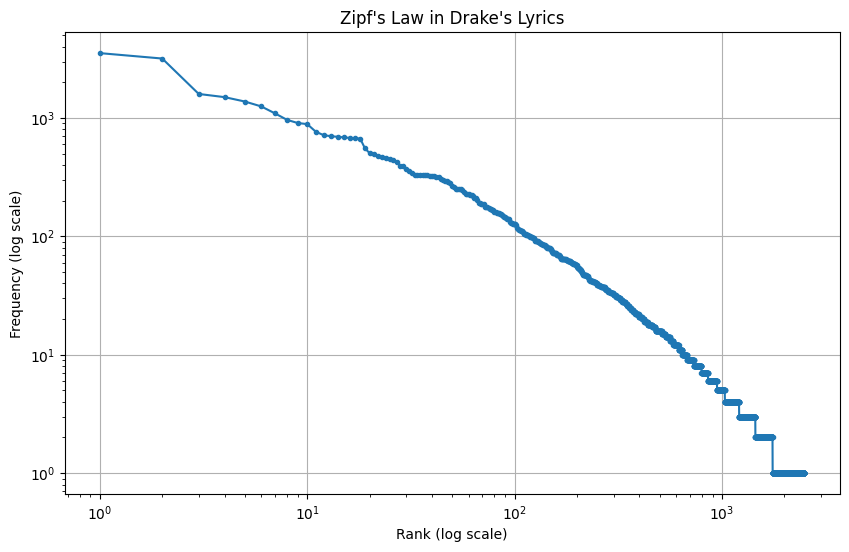

In [ ]:
import matplotlib.pyplot as plt
freq_series = pd.Series(tokens).value_counts().reset_index()
freq_series.columns = ['word', 'frequency']
freq_series['rank'] = np.arange(1, len(freq_series) + 1)
ranks = freq_series['rank']
frequencies = freq_series['frequency']
plt.figure(figsize=(10, 6))
plt.loglog(freq_series['rank'], freq_series['frequency'], marker='.')
plt.title("Zipf's Law in Drake's Lyrics")
plt.xlabel("Rank (log scale)")
plt.ylabel("Frequency (log scale)")
plt.grid(True)
plt.show()

# Compare with Ideal Zipf Distribution

<ipython-input-23-6773b3d4b5ee>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='frequency', y='word', data=top_words, palette="viridis")


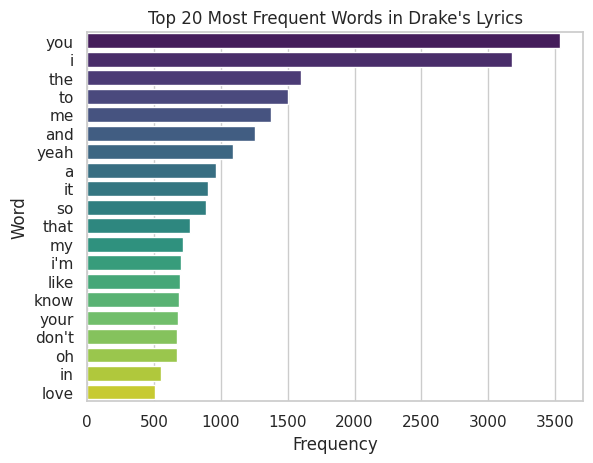

In [ ]:
import seaborn as sns
top_words = freq_series.head(20)
sns.set(style="whitegrid")
sns.barplot(x='frequency', y='word', data=top_words, palette="viridis")
plt.title("Top 20 Most Frequent Words in Drake's Lyrics")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.show()

The dataset largely follows Zipf’s Law, as seen from the near-linear pattern on a log-log plot. The most frequent words dominate the dataset, with frequency rapidly decreasing for lower-ranked words. This pattern suggests natural language characteristics in the dataset, possibly influenced by translation style/author choices...